https://docs.juliacn.com/latest/manual/metaprogramming/#符号


+ Symbol: 形式为interned string, 是表达式的一种组成, 用于access to varable. 当表达式被求值时，符号会被替换为这个符号在对应作用域scope中所绑定的值。**Symbol的值,即eval, 为其对应的变量, eval(:x)=x**
+ premitive Expr: 由1个可执行的操作符operator和它所需要的符号Symbol或字面量组成, 操作符可以是运算符、函数等
+ Expr: 由premitive Expr构成，有可能存在嵌套 

**[不用深究 interned string:]((https://en.wikipedia.org/wiki/String_interning))** In computer science, string interning is a method of storing only one copy of each distinct string value, which must be immutable. Interning strings makes some string processing tasks more time-efficient or space-efficient at the cost of requiring more time when the string is created or interned. 

In [2]:
a = 1 + 2

3

In [3]:
a_symbol = :a
typeof(:a) |> display
a_symbol |> typeof |> display
typeof(:(a)) |> display
typeof(:(a+0)) |> display

Symbol

Symbol

Symbol

Expr

In [4]:
using TreeView

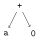

In [19]:
# @tree :a  # TreeView的@tree 和walk_tree()都对 Symbol无效
TreeView.walk_tree(:(a+0))

In [19]:
eval(a_symbol) |> display
# Symbol的值,即eval, 为其对应的变量, eval(:x)=x

fieldnames(Symbol) |> display
fieldnames(Expr) |> display
supertype(Symbol) |> display
supertype(Expr) |> display

3

()

(:head, :args)

Any

Any

: 作为Symbol语法时，符号的名称必须是有效的标识符。<br>
否则，必须使用 Symbol(str) 构造函数

In [22]:
:2 |> display  # 不是有效的标识符, 无效
:2 |> typeof |> display
:(2) |> typeof |> display

2

Int64

Int64

In [10]:
:s(-2)

MethodError: MethodError: objects of type Symbol are not callable
The object of type `Symbol` exists, but no method is defined for this combination of argument types when trying to treat it as a callable object.

In [16]:
Symbol("s(",-2,")") |> display
Symbol("s(-2)") |> display
Symbol(:s,"(-2)") |> display

Symbol("2") |> display
Symbol("a", "b") |> display

Symbol("s(-2)")

Symbol("s(-2)")

Symbol("s(-2)")

Symbol("2")

:ab

In [20]:
abs_2 = abs(-2)
abs_2 |> display
typeof(:abs_2) |> display

abs_symbol = Symbol("abs(-2)")
abs_symbol |> display
eval(abs_symbol)  # Error
# 虽然构造了Symbol("abs(-2)")，但不是绝对值函数 abs(-2)

2

Symbol

Symbol("abs(-2)")

UndefVarError: UndefVarError: `abs(-2)` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [21]:
abs_ex = :(abs(-2))
typeof(abs_ex) |> display
abs_ex.head |> display
abs_ex.args |> display

Expr

:call

2-element Vector{Any}:
   :abs
 -2

In [23]:
eval(:abs) |> display
eval(:abs)(-3) |> display

abs (generic function with 11 methods)

3

In [24]:
:(:) |> display
:(:) |> typeof |> display
dump(:(:))

:(:)

Symbol

Symbol :


In [25]:
:(::) |> display
:(::) |> typeof |> display
dump(:(::))


:(::)

Symbol

Symbol ::


https://riptutorial.com/julia-lang/example/26313/guide

In [ ]:
myName = 42
mySymbol = Symbol("myName")

mySymbol |> display
eval(mySymbol) |> display

:myName

42

In [ ]:
:($mySymbol = 1 ) |> display
:($mySymbol = 1 ) |> eval
@show myName

:(myName = 1)

myName = 1


1

In [4]:
function dothing(flag)
    if flag == :thing_one
      println("did thing one")
    elseif flag == :thing_two
      println("did thing two")
    end
end

dothing(:thing_one)
dothing(:thing_two)

did thing one
did thing two


In [6]:
number_names = Dict{Symbol, Int}()
number_names[:one] = 1
number_names[:two] = 2
number_names[:six] = 6
number_names

Dict{Symbol, Int64} with 3 entries:
  :six => 6
  :two => 2
  :one => 1

In [10]:
:mySymbol2 = Symbol("hello world") # 不能这样赋值

ErrorException: syntax: invalid assignment location ":mySymbol2" around e:\Projects.jl\Training.jl\9. Expr\jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_X56sZmlsZQ==.jl:1

Julia中 : 有两个作用
+ 构造 Symbol 实例
+ 构造 Expr 实例: 后面跟着包围着单个 Julia语句括号
<br><br>

`:(foo)`:
+ 如果`foo`是字面量，产生字面量
+ 如果是有效的标识符，产生符号Symbol，否则是一个表达式Expr。

In [38]:
:(a) |> typeof |> display
:(a) |> display

:(2) |> typeof |> display
:(2) |> display

:(1 + 1) |> typeof |> display

Symbol

:a

Int64

2

Expr

In [31]:
using General.Aux

In [34]:
colon_ex = :(a + 1)

colon_ex |> display
typeof(:colon_ex) |> display
@logt colon_ex


:(a + 1)

Symbol


colon_ex, Expr
  = a + 1


In [36]:
a = 1
eval(:colon_ex) |> display 
eval(colon_ex)|> display
eval(:(1 + 1)) |> display
typeof(:(1 + 1)) |> display

:(a + 1)

2

2

Expr

In [39]:
Meta.show_sexpr(colon_ex)

(:call, :+, :a, 1)

In [49]:
function add(x,y)
    x + y
end
add23 = add(2,3)
dump(:(add(2,3)))

Expr
  head: Symbol call
  args: Array{Any}((3,))
    1: Symbol add
    2: Int64 2
    3: Int64 3


In [53]:
score=78
conclusion=""
if score > 60
    conclusion="Pass"
else
    conclusion="Exam Again"
end
conclusion

"Pass"

In [109]:
colon_block_ex = :(
begin
    score=78
    conclusion=""
    if score > 60
        conclusion="Pass"
    else
        conclusion="Exam Again"
    end
    conclusion
end
)

quote
    #= e:\Projects.jl\Training.jl\9. Expr\jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_X50sZmlsZQ==.jl:3 =#
    score = 78
    #= e:\Projects.jl\Training.jl\9. Expr\jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_X50sZmlsZQ==.jl:4 =#
    conclusion = ""
    #= e:\Projects.jl\Training.jl\9. Expr\jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_X50sZmlsZQ==.jl:5 =#
    if score > 60
        #= e:\Projects.jl\Training.jl\9. Expr\jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_X50sZmlsZQ==.jl:6 =#
        conclusion = "Pass"
    else
        #= e:\Projects.jl\Training.jl\9. Expr\jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_X50sZmlsZQ==.jl:8 =#
        conclusion = "Exam Again"
    end
    #= e:\Projects.jl\Training.jl\9. Expr\jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_X50sZmlsZQ==.jl:10 =#
    conclusion
end

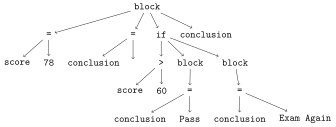

In [115]:
TreeView.walk_tree(Base.remove_linenums!(colon_block_ex))

In [116]:
Meta.show_sexpr(colon_block_ex)

(:block,
  (:(=), :score, 78),
  (:(=), :conclusion, ""),
  (:if, (:call, :>, :score, 60), (:block,
      (:(=), :conclusion, "Pass")
    ), (:block,
      (:(=), :conclusion, "Exam Again")
    )),
  :conclusion
)

In [125]:
colon_statements_ex = :(
begin
    a=1
    b=1+1
    c=3
    d= a+b*c+1
end
)

quote
    #= e:\Projects.jl\Training.jl\9. Expr\jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_Y100sZmlsZQ==.jl:3 =#
    a = 1
    #= e:\Projects.jl\Training.jl\9. Expr\jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_Y100sZmlsZQ==.jl:4 =#
    b = 1 + 1
    #= e:\Projects.jl\Training.jl\9. Expr\jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_Y100sZmlsZQ==.jl:5 =#
    c = 3
    #= e:\Projects.jl\Training.jl\9. Expr\jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_Y100sZmlsZQ==.jl:6 =#
    d = a + b * c + 1
end

In [129]:
colon_statements_ex = :(a=1; b=1+1; c=3; d= a+b*c+1;)

quote
    a = 1
    #= e:\Projects.jl\Training.jl\9. Expr\jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_X40sZmlsZQ==.jl:1 =#
    b = 1 + 1
    #= e:\Projects.jl\Training.jl\9. Expr\jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_X40sZmlsZQ==.jl:1 =#
    c = 3
    #= e:\Projects.jl\Training.jl\9. Expr\jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_X40sZmlsZQ==.jl:1 =#
    d = a + b * c + 1
end

In [99]:
Meta.show_sexpr(colon_statements_ex)

(:block,
  (:(=), :a, 1),
  :(#= e:\Projects.jl\Training.jl\9. Expr\jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_X40sZmlsZQ==.jl:1 =#),
  (:(=), :b, (:call, :+, 1, 1)),
  :(#= e:\Projects.jl\Training.jl\9. Expr\jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_X40sZmlsZQ==.jl:1 =#),
  (:(=), :c, 3),
  :(#= e:\Projects.jl\Training.jl\9. Expr\jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_X40sZmlsZQ==.jl:1 =#),
  (:(=), :d, (:call, :+, :a, (:call, :*, :b, :c), 1))
)

In [111]:
dump(colon_statements_ex)

Expr
  head: Symbol block
  args: Array{Any}((7,))
    1: Expr
      head: Symbol =
      args: Array{Any}((2,))
        1: Symbol a
        2: Int64 1
    2: LineNumberNode
      line: Int64 1
      file: Symbol e:\Projects.jl\Training.jl\9. Expr\jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_X40sZmlsZQ==.jl
    3: Expr
      head: Symbol =
      args: Array{Any}((2,))
        1: Symbol b
        2: Expr
          head: Symbol call
          args: Array{Any}((3,))
            1: Symbol +
            2: Int64 1
            3: Int64 1
    4: LineNumberNode
      line: Int64 1
      file: Symbol e:\Projects.jl\Training.jl\9. Expr\jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_X40sZmlsZQ==.jl
    5: Expr
      head: Symbol =
      args: Array{Any}((2,))
        1: Symbol c
        2: Int64 3
    6: LineNumberNode
      line: Int64 1
      file: Symbol e:\Projects.jl\Training.jl\9. Expr\jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_X40sZmlsZQ==.jl
    7: Expr
      head: Symbol =

In [112]:
Base.remove_linenums!(colon_statements_ex)

quote
    a = 1
    b = 1 + 1
    c = 3
    d = a + b * c + 1
end

In [106]:
Meta.show_sexpr(colon_statements_ex)

(:block,
  (:(=), :a, 1),
  (:(=), :b, (:call, :+, 1, 1)),
  (:(=), :c, 3),
  (:(=), :d, (:call, :+, :a, (:call, :*, :b, :c), 1))
)

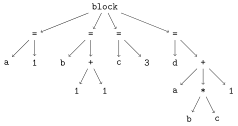

In [107]:
TreeView.walk_tree(colon_statements_ex)

In [113]:
dump(colon_statements_ex)

Expr
  head: Symbol block
  args: Array{Any}((4,))
    1: Expr
      head: Symbol =
      args: Array{Any}((2,))
        1: Symbol a
        2: Int64 1
    2: Expr
      head: Symbol =
      args: Array{Any}((2,))
        1: Symbol b
        2: Expr
          head: Symbol call
          args: Array{Any}((3,))
            1: Symbol +
            2: Int64 1
            3: Int64 1
    3: Expr
      head: Symbol =
      args: Array{Any}((2,))
        1: Symbol c
        2: Int64 3
    4: Expr
      head: Symbol =
      args: Array{Any}((2,))
        1: Symbol d
        2: Expr
          head: Symbol call
          args: Array{Any}((4,))
            1: Symbol +
            2: Symbol a
            3: Expr
              head: Symbol call
              args: Array{Any}((3,))
                1: Symbol *
                2: Symbol b
                3: Symbol c
            4: Int64 1
